Import Data

In [277]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("anmolkumar/health-insurance-cross-sell-prediction")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Binh\.cache\kagglehub\datasets\anmolkumar\health-insurance-cross-sell-prediction\versions\1


In [278]:
#import library
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
dataset = Path(path) / "train.csv"

In [279]:
#read data
df = pd.read_csv(dataset)
df.head()


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


EDA

In [280]:
df.shape

(381109, 12)

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [282]:
df.shape

(381109, 12)

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [284]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [285]:
df.describe(include='O')

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [286]:
df["Region_Code"].value_counts()

Region_Code
28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: count, dtype: int64

In [287]:
#Transfrom region code
df['Region_Code'] = df['Region_Code'].apply(lambda x: 1 if x == 28.0 else 0)
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,1,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,1,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [288]:
# Transform categorical columns 
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes': 1, 'No': 0})
df = pd.get_dummies(df, columns=['Vehicle_Age'], drop_first=True)
df['Vehicle_Age_< 1 Year'] = df['Vehicle_Age_< 1 Year'].map({True: 1, False: 0})
df['Vehicle_Age_> 2 Years'] = df['Vehicle_Age_> 2 Years'].map({True: 1, False: 0})
df.drop(columns = ["id"], inplace=True)

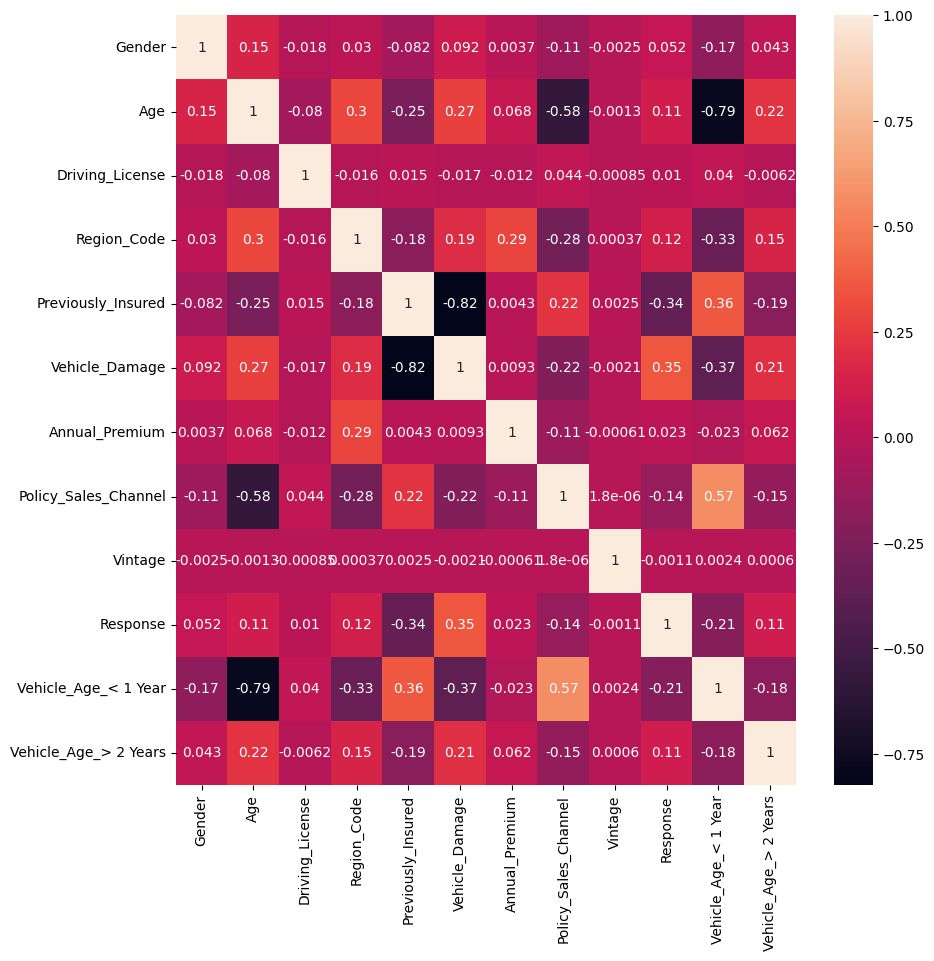

In [289]:
# Check correlation

fix, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, ax=ax)
plt.show()

In [290]:

corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

print("Columns to remove:", to_drop)


Columns to remove: ['Vehicle_Damage']


In [291]:
df.drop(columns = ["Vehicle_Damage"], inplace=True)

In [292]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

#Min-Max scaler
scaler = MinMaxScaler()

df[['Age', 'Vintage', 'Annual_Premium']] = scaler.fit_transform(df[['Age', 'Vintage', 'Annual_Premium']])

In [293]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,0.369231,1,1,0,0.070366,26.0,0.716263,1,0,1
1,1,0.861538,1,0,0,0.057496,26.0,0.598616,0,0,0
2,1,0.415385,1,1,0,0.066347,26.0,0.058824,1,0,1
3,1,0.015385,1,0,1,0.048348,152.0,0.667820,0,1,0
4,0,0.138462,1,0,1,0.046259,152.0,0.100346,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,1,0.830769,1,0,1,0.051234,26.0,0.269896,0,0,0
381105,1,0.153846,1,0,1,0.069551,152.0,0.418685,0,1,0
381106,1,0.015385,1,0,1,0.060439,160.0,0.522491,0,1,0
381107,0,0.738462,1,0,0,0.078110,124.0,0.221453,0,0,1


In [294]:
x = df.drop(columns = ["Response"])
y = df["Response"]
x.shape, y.shape

((381109, 10), (381109,))

Apply model

In [295]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [296]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((304887, 10), (76222, 10), (304887,), (76222,))

In [297]:
y_train.value_counts()

Response
0    267700
1     37187
Name: count, dtype: int64

Imbalance

In [298]:
# Oversampling use SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)
x_train_smote.shape, y_train_smote.shape

((535400, 10), (535400,))

In [299]:
y_train_smote.value_counts()

Response
1    267700
0    267700
Name: count, dtype: int64

c:\Users\Binh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.60      0.74     66699
           1       0.25      0.93      0.39      9523

    accuracy                           0.64     76222
   macro avg       0.62      0.76      0.57     76222
weighted avg       0.89      0.64      0.70     76222

Accuracy: 0.6401826244391383
Precision: 0.24851805028796178
Recall: 0.9289089572613672
F1 Score: 0.3921273106077397


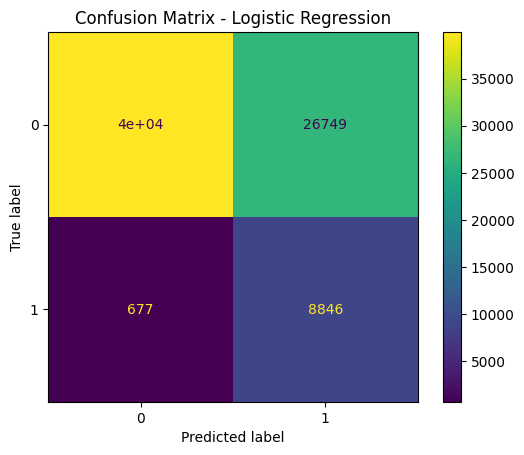

In [300]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Train Logistic Regression model
model_log = LogisticRegression()
model_log.fit(x_train_smote, y_train_smote)

# Predict on test set
y_pred_log = model_log.predict(x_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_log))

print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log))

ConfusionMatrixDisplay.from_estimator(model_log, x_test, y_test)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [301]:
x_train_smote = x_train_smote.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Less_1Year", "Vehicle_Age_> 2 Years": "Vehicle_More_2Year"}, errors="raise")
x_test = x_test.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Less_1Year", "Vehicle_Age_> 2 Years": "Vehicle_More_2Year" }, errors="raise")

              precision    recall  f1-score   support

           0       0.96      0.75      0.84     66699
           1       0.30      0.76      0.43      9523

    accuracy                           0.75     76222
   macro avg       0.63      0.75      0.63     76222
weighted avg       0.87      0.75      0.79     76222



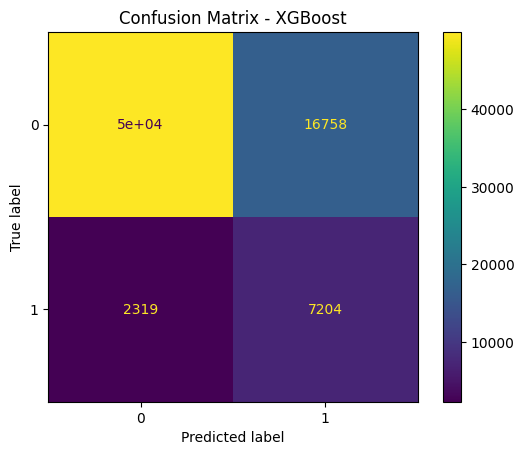

In [302]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import xgboost as xgb

# Train XGBoost model
model_xgb = xgb.XGBClassifier(random_state=42, n_estimators=100)
model_xgb.fit(x_train_smote, y_train_smote)

# Predict on test set
y_pred = model_xgb.predict(x_test)

print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(model_xgb, x_test, y_test)
plt.title("Confusion Matrix - XGBoost")
plt.show()


              precision    recall  f1-score   support

           0       0.92      0.85      0.88     66699
           1       0.30      0.46      0.37      9523

    accuracy                           0.80     76222
   macro avg       0.61      0.65      0.62     76222
weighted avg       0.84      0.80      0.82     76222



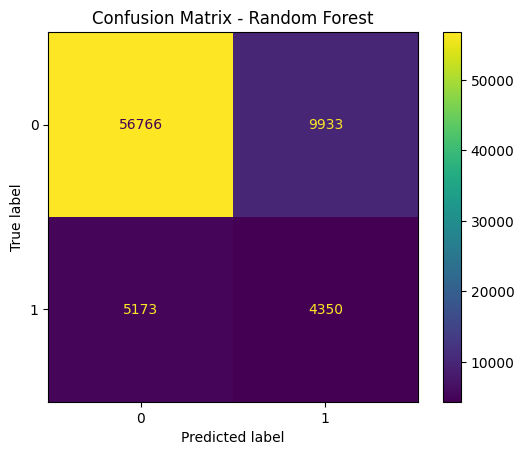

In [303]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train Random Forest model
forest = RandomForestClassifier(random_state=42)
forest.fit(x_train_smote, y_train_smote)

# Predict on test set
y_pred = forest.predict(x_test)

print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(forest, x_test, y_test)
plt.title("Confusion Matrix - Random Forest")
plt.show()


Because our problem specifically focuses on individuals who have the potential to become prospective customers, the recall metric for class = 1 is the most important.
=> Therefore, we choose the Logistic Regression model with a recall for class = 1 of 93%.